In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

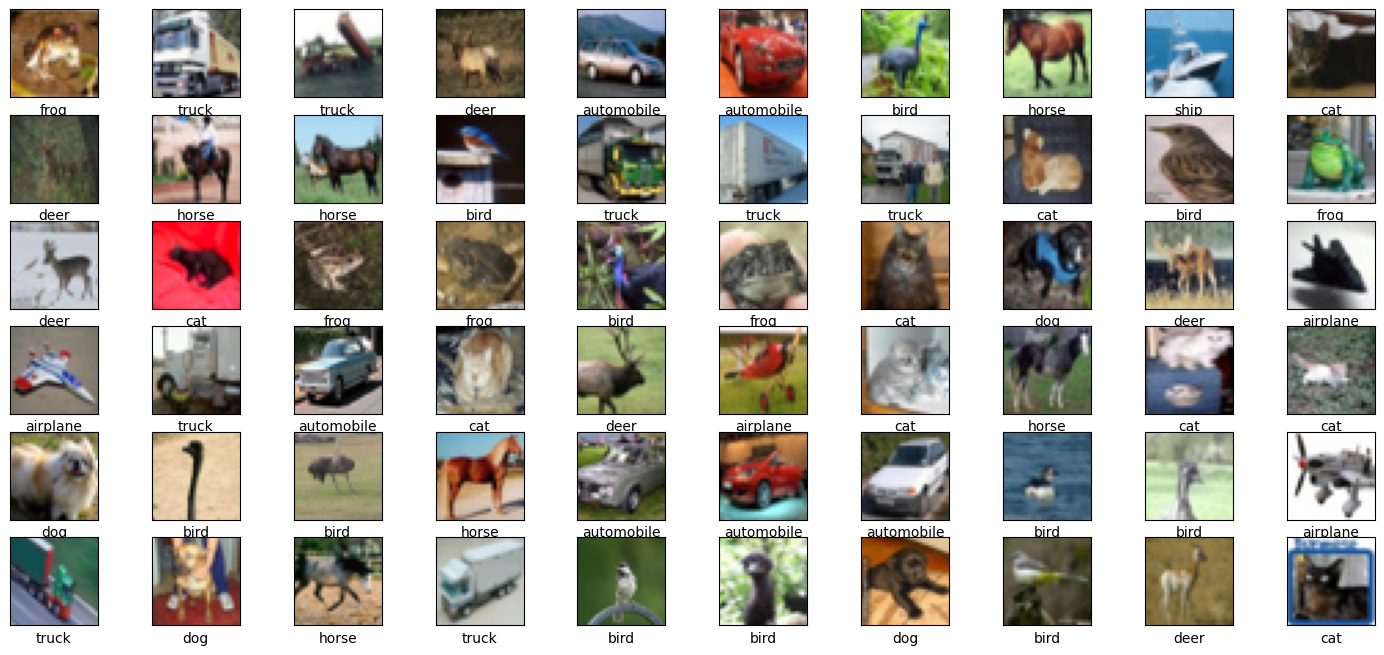

In [4]:
plt.figure(figsize=(18,8))
for i in range(60):
    plt.subplot(6, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [27]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1_L2 regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    ## hidden layer with L1_L2 regularization
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                      

In [28]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.000008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [29]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 8s 7ms/step - loss: 2.7036 - accuracy: 0.1650 - val_loss: 2.3941 - val_accuracy: 0.2340
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 2.2792 - accuracy: 0.2680 - val_loss: 2.1720 - val_accuracy: 0.3053
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 2.1107 - accuracy: 0.3244 - val_loss: 2.0482 - val_accuracy: 0.3457
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 2.0062 - accuracy: 0.3607 - val_loss: 1.9617 - val_accuracy: 0.3781
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.9269 - accuracy: 0.3919 - val_loss: 1.8958 - val_accuracy: 0.4010
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.8646 - accuracy: 0.4138 - val_loss: 1.8444 - val_accuracy: 0.4158
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.8149 - accuracy: 0.4311 - val_loss: 1.8004 - val_accuracy: 0.4353
Epoch 

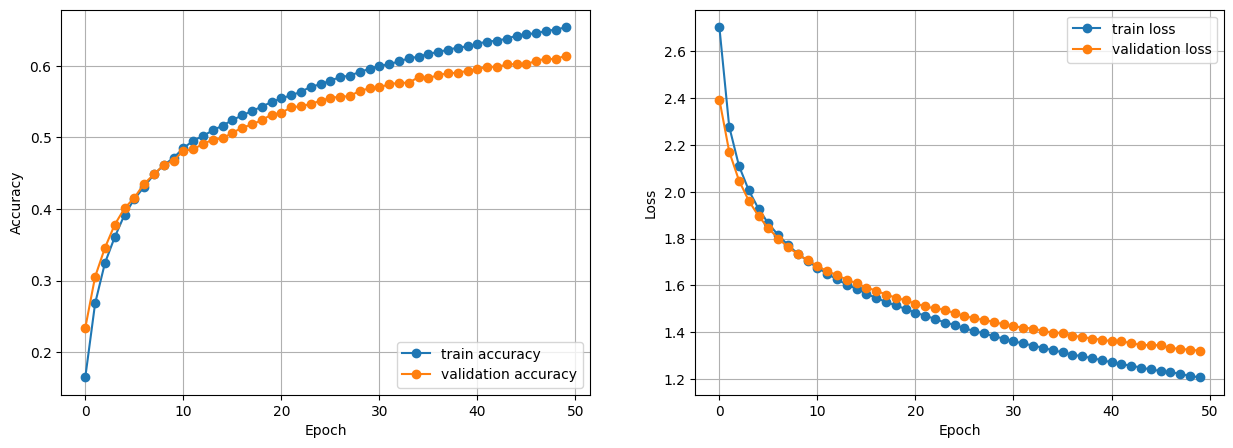

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [31]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.3205 - accuracy: 0.6145

Test Accuracy: 0.6144999861717224

Test Loss: 1.3204821348190308


In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [39]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model2 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1_L2 regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    ## hidden layer with L1_L2 regularization
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                      

In [40]:
model2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
h = model2.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 7s 7ms/step - loss: 2.4024 - accuracy: 0.2322 - val_loss: 2.1712 - val_accuracy: 0.3080
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 2.0634 - accuracy: 0.3436 - val_loss: 2.0007 - val_accuracy: 0.3677
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 1.9406 - accuracy: 0.3840 - val_loss: 1.9045 - val_accuracy: 0.3953
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 1.8545 - accuracy: 0.4146 - val_loss: 1.8309 - val_accuracy: 0.4234
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.7904 - accuracy: 0.4374 - val_loss: 1.7873 - val_accuracy: 0.4330
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.7411 - accuracy: 0.4580 - val_loss: 1.7598 - val_accuracy: 0.4442
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.6993 - accuracy: 0.4746 - val_loss: 1.7081 - val_accuracy: 0.4633
Epoch 

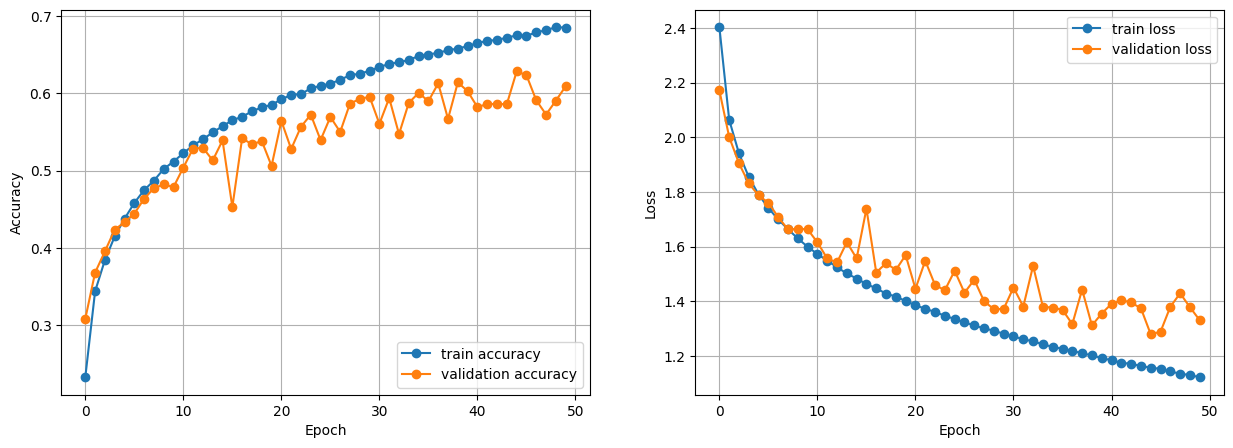

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [58]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model3 = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    ## hidden layers with L1_L2 regularization
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    ## hidden layer with L1_L2 regularization
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])

model3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_33 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                     

In [59]:
model3.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.000008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
h = model3.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 8s 7ms/step - loss: 4.6466 - accuracy: 0.1813 - val_loss: 4.3669 - val_accuracy: 0.2485
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 4.2165 - accuracy: 0.2959 - val_loss: 4.1178 - val_accuracy: 0.3284
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 4.0241 - accuracy: 0.3496 - val_loss: 3.9637 - val_accuracy: 0.3717
Epoch 4/50
782/782 [==============================] - 5s 6ms/step - loss: 3.8922 - accuracy: 0.3874 - val_loss: 3.8467 - val_accuracy: 0.3987
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 3.7849 - accuracy: 0.4132 - val_loss: 3.7504 - val_accuracy: 0.4210
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 3.6923 - accuracy: 0.4351 - val_loss: 3.6702 - val_accuracy: 0.4370
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 3.6117 - accuracy: 0.4519 - val_loss: 3.5941 - val_accuracy: 0.4533
Epoch 

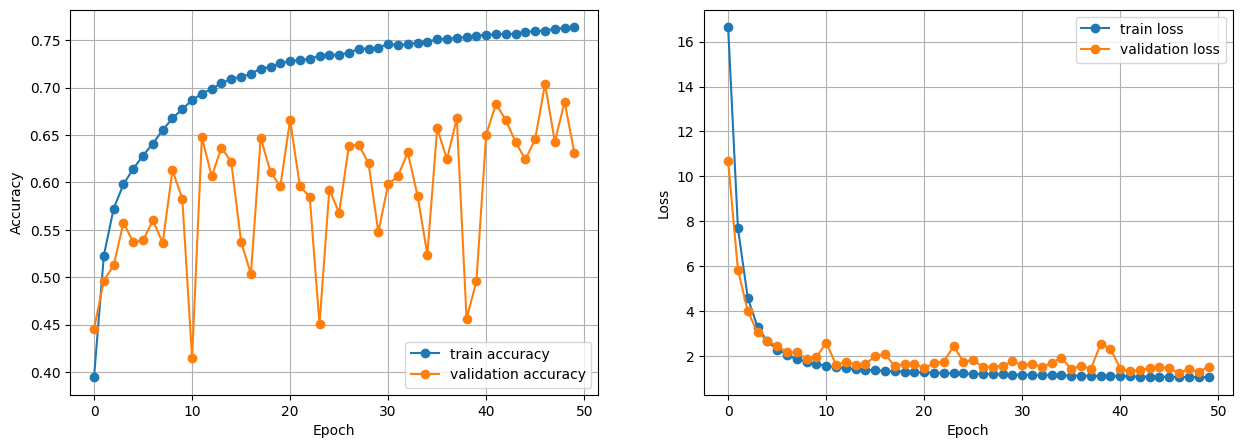

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()